<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/7%EC%A3%BC%EC%B0%A8/stock_market_analysis_prediction_using_lr_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 환경설정

In [ ]:
!conda install pandas-datareader
!pip install yfinance

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 363 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# 1. 데이터 불러오기

삼성전자 주가 불러오기([야후파이낸스](https://finance.yahoo.com/))

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yfin
from pandas_datareader import data
from datetime import datetime

yfin.pdr_override()

# 분석할 기간
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df = data.get_data_yahoo('005930.KS', start = start, end = end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-15,76400.0,77600.0,76300.0,77600.0,75865.523438,9584939
2021-12-16,78500.0,78500.0,77400.0,77800.0,76061.054688,11996128
2021-12-17,76800.0,78000.0,76800.0,78000.0,76256.585938,13108479
2021-12-20,77600.0,77800.0,76800.0,77100.0,75376.703125,11264375
2021-12-21,77900.0,78300.0,77500.0,78100.0,76354.351562,14245298


# 2. 데이터 전처리



## 2.1. Time 컬럼 추가

In [ ]:
df['Time'] = np.arange(len(df.index))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2021-12-15,76400.0,77600.0,76300.0,77600.0,75865.523438,9584939,0
2021-12-16,78500.0,78500.0,77400.0,77800.0,76061.054688,11996128,1
2021-12-17,76800.0,78000.0,76800.0,78000.0,76256.585938,13108479,2
2021-12-20,77600.0,77800.0,76800.0,77100.0,75376.703125,11264375,3
2021-12-21,77900.0,78300.0,77500.0,78100.0,76354.351562,14245298,4


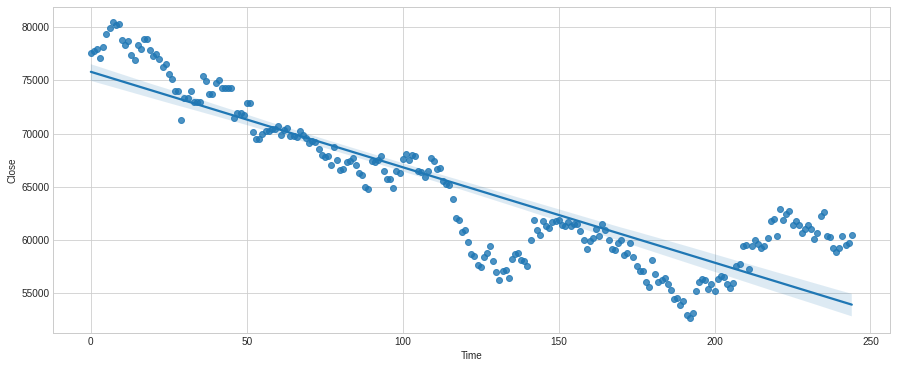

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15, 6))
sns.regplot(x='Time', y='Close', data=df)

## 2.2. Lag_1 컬럼 추가

In [ ]:
df['Lag_1'] = df['Close'].shift(1)
df2 = df.reindex(columns=['Close', 'Lag_1'])
df2.head()

,Close,Lag_1
Date,,
2021-12-15,77600.0,NaN
2021-12-16,77800.0,77600.0
2021-12-17,78000.0,77800.0
2021-12-20,77100.0,78000.0
2021-12-21,78100.0,77100.0


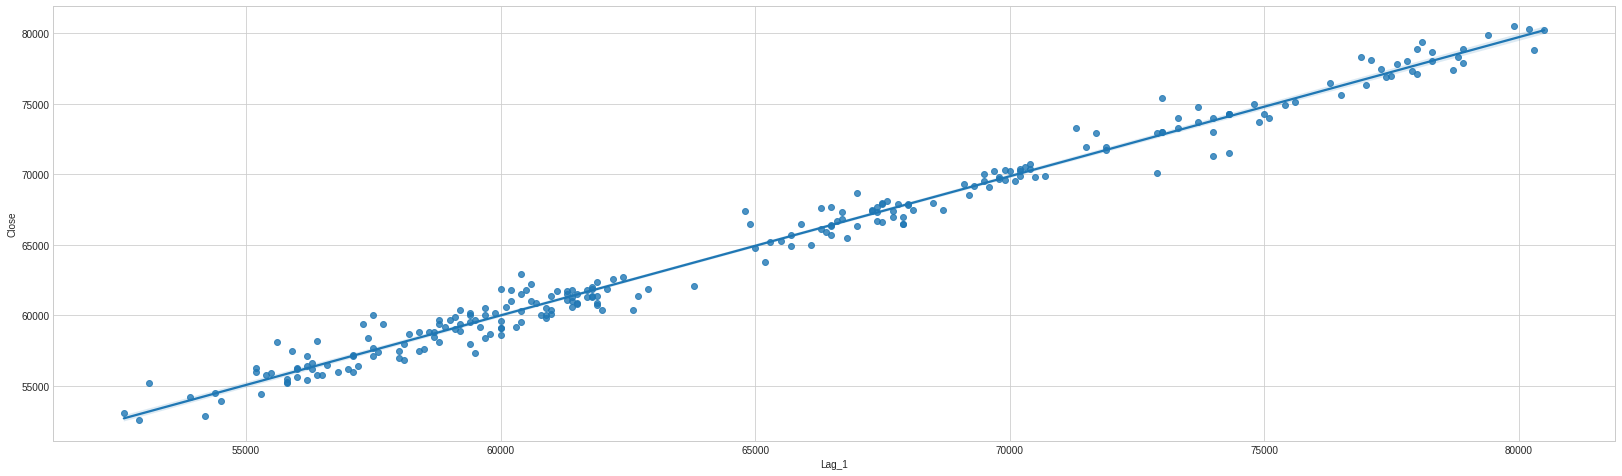

In [ ]:
ax = sns.regplot(x='Lag_1', y='Close', data=df)

# 3. 학습


## 3.1. LinearRegression(1)
 - X: Time
 - y: Close

In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
df['y_pred'] = model.predict(X)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,Lag_1,y_pred
Date,,,,,,,,,
2021-12-15,76400.0,77600.0,76300.0,77600.0,75865.523438,9584939,0,NaN,75808.830264
2021-12-16,78500.0,78500.0,77400.0,77800.0,76061.054688,11996128,1,77600.0,75719.048952
2021-12-17,76800.0,78000.0,76800.0,78000.0,76256.585938,13108479,2,77800.0,75629.267640
2021-12-20,77600.0,77800.0,76800.0,77100.0,75376.703125,11264375,3,78000.0,75539.486328
2021-12-21,77900.0,78300.0,77500.0,78100.0,76354.351562,14245298,4,77100.0,75449.705016


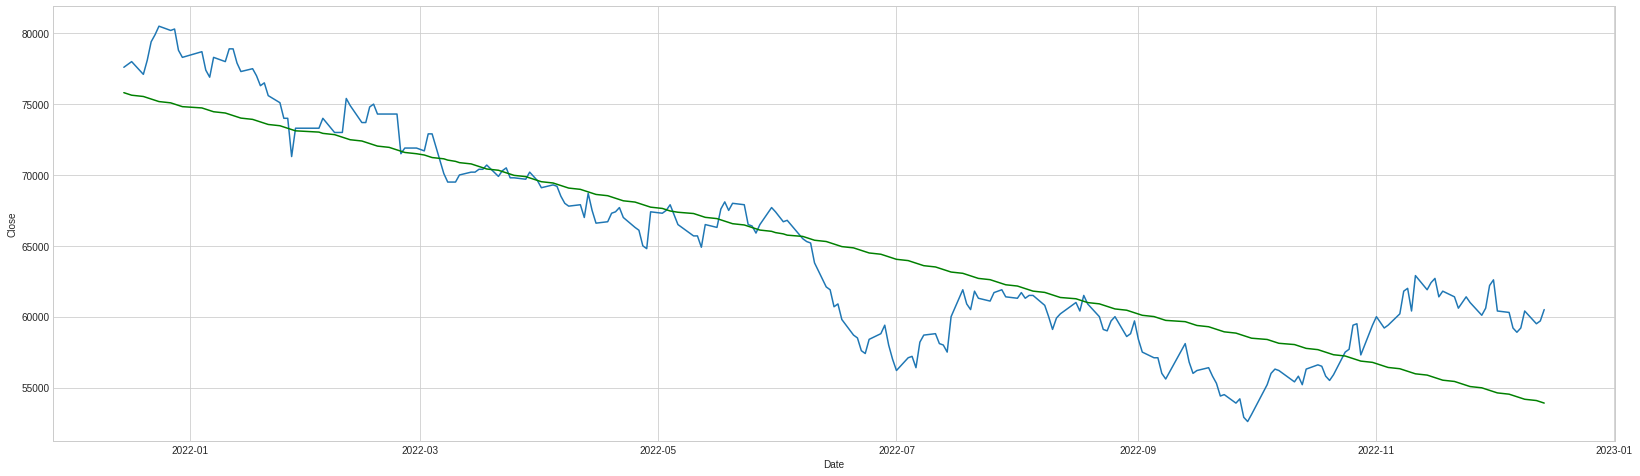

In [ ]:
sns.lineplot(x= df.index, y=df['Close'])
sns.lineplot(x= df.index, y=df['y_pred'], color="g")

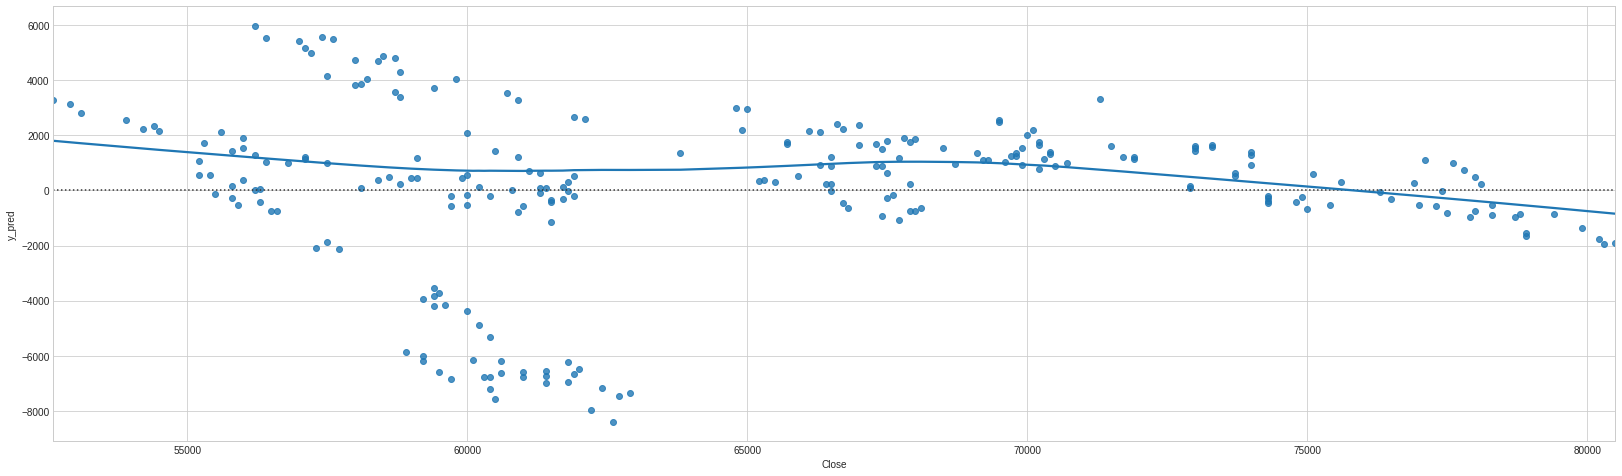

In [ ]:
sns.residplot(x=df['Close'], y=df['y_pred'], lowess=True)

## 3.2. LinearRegression(2)
 - X: Lag_1
 - y: Close

In [ ]:
df2.dropna(inplace=True) 

In [ ]:
from sklearn.linear_model import LinearRegression

X = df2.loc[:, ['Lag_1']]
y = df2.loc[:, 'Close'] 
y, X = y.align(X, join='inner') 

model = LinearRegression()
model.fit(X, y)

df2['y_pred'] = model.predict(X)

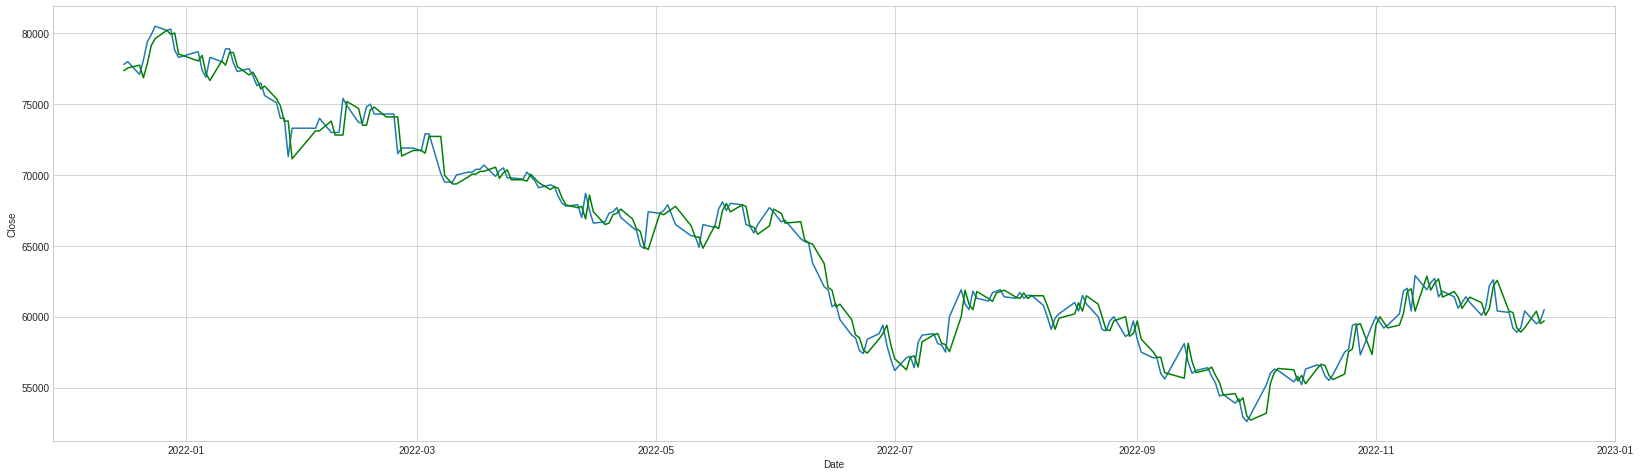

In [ ]:
sns.lineplot(x= df2.index, y=df2['Close'])
sns.lineplot(x= df2.index, y=df2['y_pred'], color="g")

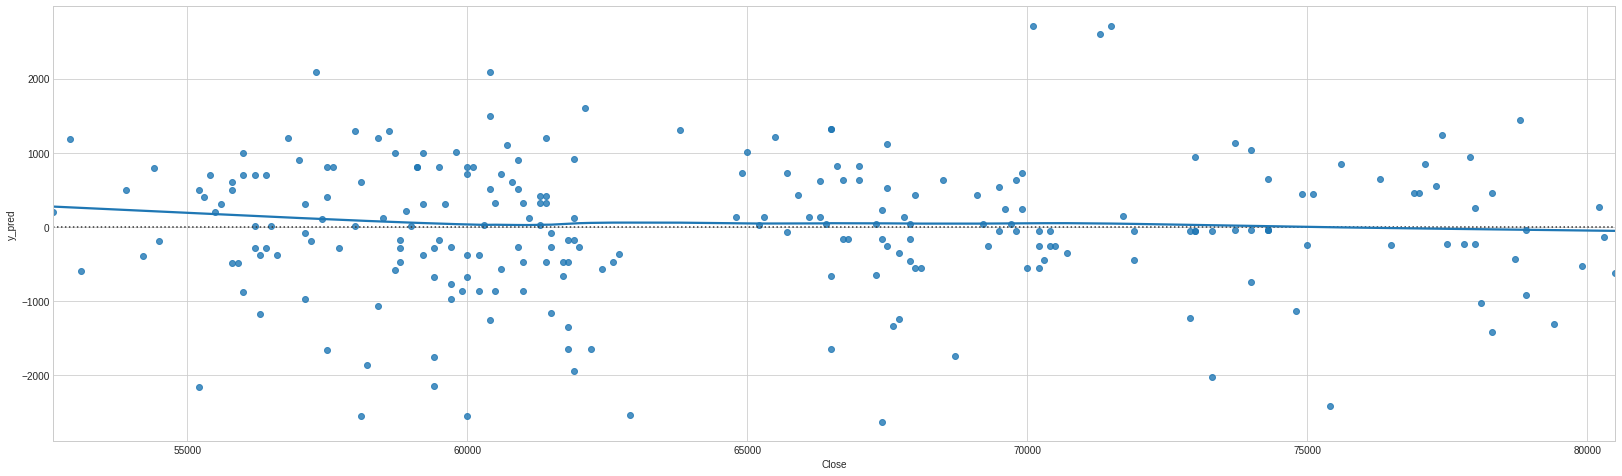

In [ ]:
sns.residplot(x=df2['Close'], y=df2['y_pred'], lowess=True)

In [ ]:
df3 = df2.iloc[0:200] #train
df4 = df2.iloc[200:] #test

In [ ]:
X = df3.loc[:, ['Lag_1']]
y = df3.loc[:, 'Close'] 
y, X = y.align(X, join='inner') 

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
X = df4.loc[:, ['Lag_1']]
y = df4.loc[:, 'Close'] 
y, X = y.align(X, join='inner')

In [ ]:
df4['y_pred2'] = model.predict(X)

<ipython-input-28-a1bbd950564e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['y_pred2'] = model.predict(X)


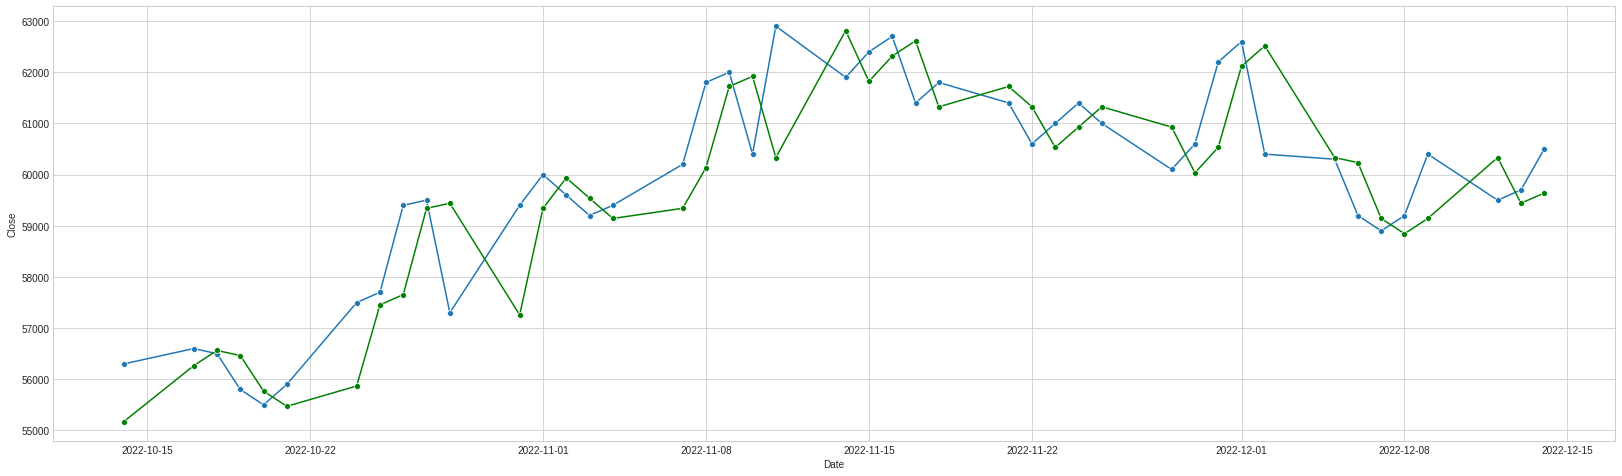

In [ ]:
sns.lineplot(x= df4.index, y=df4['Close'], marker ="o")
sns.lineplot(x= df4.index, y=df4['y_pred2'], color="g", marker ="o")

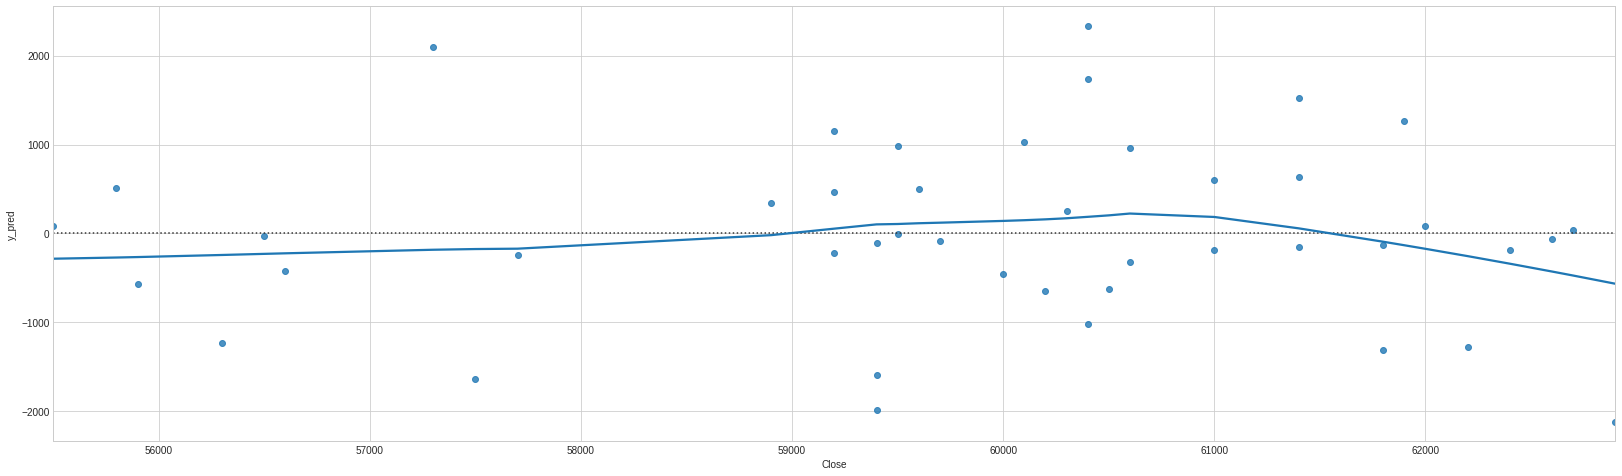

In [ ]:
sns.residplot(x=df4['Close'], y=df4['y_pred'], lowess=True)

## 3.3. LSTM

### 3.3.1 데이터 전처리

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Time,Lag_1,y_pred
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,244.000000,245.000000
mean,64907.755102,65384.897959,64391.428571,64855.510204,64157.601897,1.405538e+07,122.000000,64873.360656,64855.510204
std,7268.665984,7150.167407,7222.463818,7196.630889,6728.875636,5.662167e+06,70.869599,7205.986550,6362.765537
min,52300.000000,53600.000000,51800.000000,52600.000000,52539.000000,0.000000e+00,0.000000,52600.000000,53902.190144
25%,59000.000000,59600.000000,58600.000000,59200.000000,59030.960938,1.100050e+07,61.000000,59200.000000,59378.850174
50%,62400.000000,62600.000000,61600.000000,62100.000000,62000.000000,1.368409e+07,122.000000,62150.000000,64855.510204
75%,70000.000000,70300.000000,69700.000000,70000.000000,68842.656250,1.694450e+07,183.000000,70025.000000,70332.170234
max,80600.000000,80800.000000,80200.000000,80500.000000,78700.703125,3.794336e+07,244.000000,80500.000000,75808.830264


In [ ]:
# filter: Close 컬럼이 포함된 DataFrame 추출
# (참고) df['Close'] : Series가 반환
dataset = df.filter(['Close']).values

# 95%에 해당하는 값은 학습용 데이터 셋으로 설정(주의: 시계열데이터이기 때문에 train_test_split()사용하지 않음)
training_data_len = int(np.ceil(len(dataset) * .95 ))
training_data_len

233

In [ ]:
from sklearn.preprocessing import StandardScaler

# 신경망: 정규화(scailing)를 하는것이 예측 성능을 높이는데 도움
# 평균:0, 표준편차:1을 기준으로 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print('평균: {:.2f}, 표준편차: {}'.format(scaled_data.mean(), scaled_data.std()))

평균: -0.00, 표준편차: 1.0


In [ ]:
# X: 1일 ~ 60일, 2일 ~ 61일  ...
# Y: 61일      , 62일   ...
train_data = scaled_data[0:int(training_data_len), :] # 전체 데이터 셋의 95%(600개)
test_data = scaled_data[training_data_len - 60: , :] 

x_train = []
y_train = []
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

print("x_train: {}, y_train: {}, x_test: {}, y_test: {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train: (173, 60, 1), y_train: (173,), x_test: (12, 60, 1), y_test: (12, 1)


### 3.3.2. 학습 - LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

#return_sequences: sequence 출력여부
#input_shape: (num_timesteps, num_features)
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

173/173 [==============================] - 9s 34ms/step - loss: 0.0634


In [ ]:
# 종가 예측 결과: 스케일링 된 형태임
y_scaled_pred = model.predict(x_test)

# 스케일을 원상복구한 값으로 변환
y_pred = scaler.inverse_transform(y_scaled_pred)

# RMSE 구하는 공식(예측값과 실제값의 차이의 제곱의 평균의 루트)
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


1336.0675703724196

<ipython-input-37-925406b42e6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


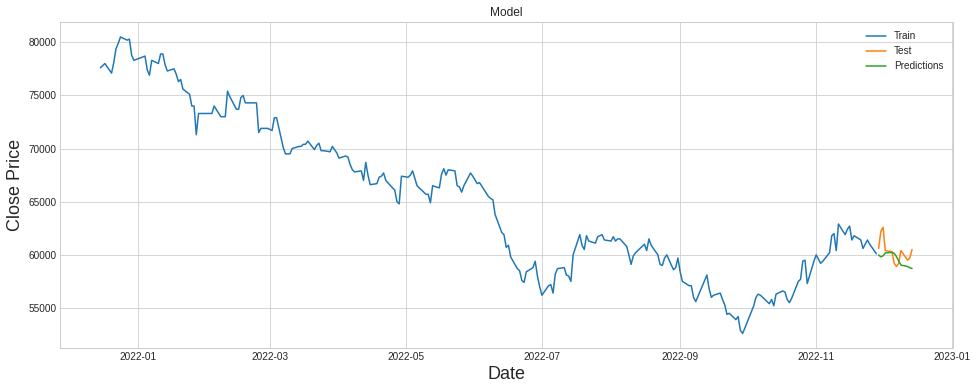

In [ ]:
data = df.filter(['Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
print('예측값:{}, 실제값:{}'.format(y_pred[-1], y_test[-1]))

예측값:[58723.637], 실제값:[60500.]
